** The following example is based on Karl Borch (1969, J. Economic Studies), where mean variance model fails to select efficient portfolios.**

- Consider the investment universe with 3 assets,
- with mean return vector:

$$ \mu = \left[1,4,9\right]^T $$

- and the covariance matrix:

$$\Sigma=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 4 & 0\\
0 & 0 & 9
\end{array}\right]$$

- Let's consider long position only
- Efficient frontier can be obtained by solving the following quadratic programming problem:

\begin{align*}
\underset{w}{\mathrm{argmin}}\quad & w^{T}\Sigma w\\
\mathrm{subject\ to}\quad & \left[\begin{array}{ccc}
1 & 1 & 1\\
1 & 4 & 9
\end{array}\right]w=\left[\begin{array}{c}
1\\
a
\end{array}\right]\\
 & w_{i}\ge0,\quad i=1,2,3
\end{align*}
with $a$ varying from $1$ to $9$

**Let's use python package cvxopt to obtain the efficient frontier**

In [1]:
from cvxopt import solvers, matrix, spdiag
from numpy import linspace, random
solvers.options['show_progress'] = False
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-9
solvers.options['feastol'] = 1e-10
P = spdiag([1.0, 4.0, 9.0])
q = matrix([0.0, 0.0, 0.0])
G = -1.0 * spdiag([1.0, 1.0, 1.0])
h = matrix([0.0, 0.0, 0.0])
A = matrix([1.0, 1.0, 1.0, 4.0, 1.0, 9.0], (2, 3))
Rs_ef, Vs_ef, Rs, Vs = linspace(1.0, 9.0, 100), [], [], []
for R in Rs_ef:
    b = matrix([1.0, R])
    sol = solvers.qp(2.0 * P, q, G=G, h=h, A=A, b=b)
    Vs_ef.append(sol['primal objective'])
    ws = random.uniform(0.0, 1.0, 3)
    ws = ws / sum(ws)
    Rs.append(ws.dot([1.0, 4.0, 9.0]))
    Vs.append((ws*ws).dot([1.0, 4.0, 9.0]))

**Plot the efficient frontier**

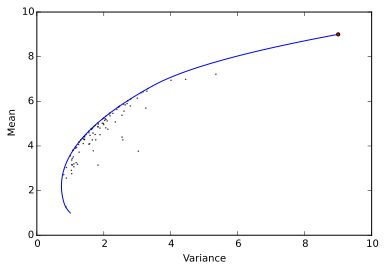

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.plot(Vs_ef, Rs_ef)
plt.xlabel('Variance')
plt.ylabel('Mean')
plt.scatter(Vs, Rs, s=0.2, c='k')
#fig = plt.scatter(9.0, 9.0, s=10, c='r', zorder = 3)
plt.scatter(9.0, 9.0, s=10, c='r', zorder = 3)

**However, let's take a look at one possible return distribution with the required moments**

| $P$ | $0.5$ | $0.5$ |
| :------: | :------: | :------: |
| $X_1$ | $0$ | $2$ |
| $X_2$ | $2$ | $6$ |
| $X_3$ | $6$ | $12$ |

- You don't need any math knowledge to get the obvious best portfolio, all in with $X_3$
- How come we got a continuum of other choices equally attractive as this one?

** What happened here? **

Modern Portfolio Theory was introduced by Harry Markowitz in 1952, lead to Nobel price in economics. It is the first mean variance model. 

In this model, portfolio selection is only based the first two moments of the random return. This is also true for some other more sophisticated models (Black–Litterman, etc).

Here the variance is chosen as risk measure, which choose non-efficient portfolios when the random return is not Gaussian. 

Is it the return normally distributed in the real world?

We know it is not (skewed, fat tail, you name it). 


** Can PyMCEF handle this situation? **
- PyMCEF use risk measures that will produce efficient portfolios according to stochastic dominance theory. (Hadar and Russell 1969, Hanoch and Levy 1969 and Rothschild and Stiglitz 1970) 

** Two risk measures are used in PyMCEF **
- Absolute semi-deviation (Ogryczak and Ruszczyński 1999)
- Fixed-target under-performance (Fishburn 1977)

** Let's use PyMCEF to solve this problem **

In [3]:
from pymcef import SimpleEF, RiskMeasure
import numpy as np
# notice that each row corresponds of all realizations of one asset return

returns = np.array([0,2,6,2,6,12]).reshape((3, 2))
labels = ['Asset 1', 'Asset 2', 'Asset 3']
sol = SimpleEF(training_set = returns, \
               risk_measure = RiskMeasure.FixTargetUnderPerformance, 
               target_return = 0,\
               asset_names = labels)

The efficient frontier only contains one portfolio.

In [4]:
for prt in sol.frontier_in_sample:
    print(prt['weight'])

{2: 1.0}


## Next example:

[2. Black Scholes revisit, delta hedging as an efficient portfolio](http://nbviewer.jupyter.org/github/hzzyyy/pymcef/blob/master/examples/2.%20Black%20Scholes%20revisit%2C%20delta%20hedging%20as%20an%20efficient%20portfolio.ipynb)